In [3]:
import pandas as pd 
import seaborn as srn
import statistics as sts 
#importar dados
dataset = pd.read_csv("C:\CIENCIAS_DE_DADOS\DADOS\DADOS_TESTE\Churn.csv", sep=";") 
#visualizar
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [4]:
#tamanho dos corpos dos dados
dataset.shape

(999, 12)

In [5]:
#Escreve os nomes da coluna de acordo do conhecimento do dado
dataset.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito",
                    "Ativo","Salario","Saiu" ]
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [6]:
agrupado = dataset.groupby(['Salario']).size()
agrupado

Salario
9.677000e+03    1
1.000000e+04    5
1.820300e+04    1
2.079200e+04    1
2.101600e+04    1
               ..
1.997254e+07    1
1.119812e+09    1
1.640179e+09    1
1.156383e+10    1
1.193469e+10    1
Length: 987, dtype: int64

<Axes: xlabel='Salario'>

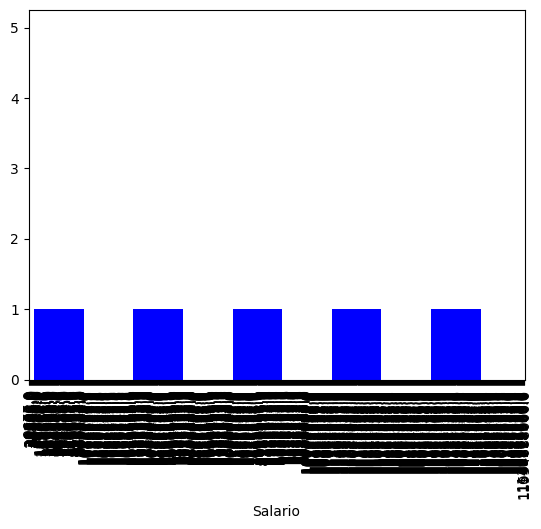

In [7]:
agrupado.plot.bar(color = 'blue')

In [8]:
agrupado = dataset.groupby(['Salario']).size()
agrupado

Salario
9.677000e+03    1
1.000000e+04    5
1.820300e+04    1
2.079200e+04    1
2.101600e+04    1
               ..
1.997254e+07    1
1.119812e+09    1
1.640179e+09    1
1.156383e+10    1
1.193469e+10    1
Length: 987, dtype: int64

<Axes: xlabel='Salario'>

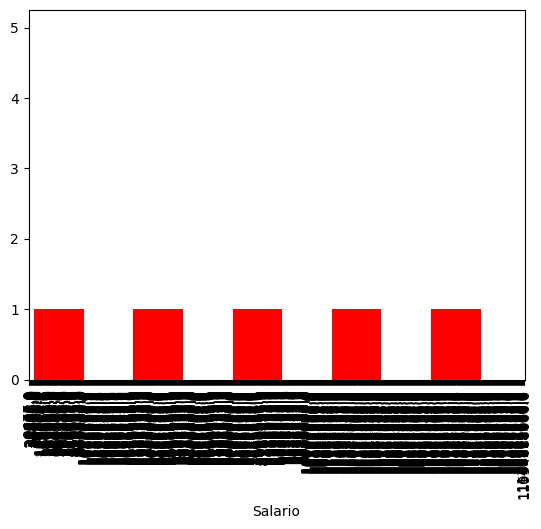

In [9]:
agrupado.plot.bar(color = 'red')

In [10]:
#explorar colunas númericas
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'teste')

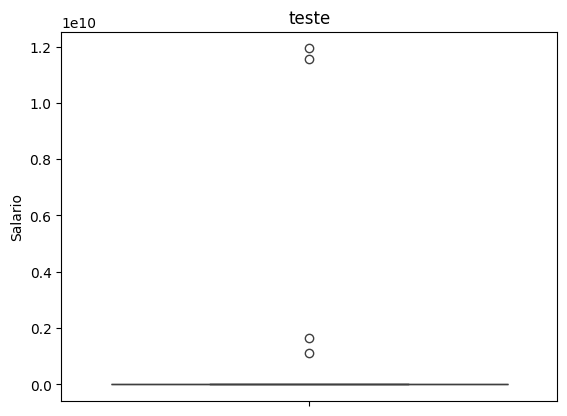

In [11]:
srn.boxplot(dataset['Salario']).set_title('teste')

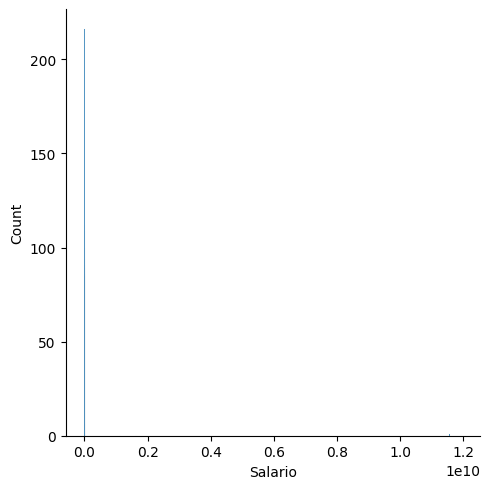

In [12]:
srn.displot(dataset['Salario'])

In [13]:
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [14]:
#verifica a mediana 
median = sts.median(dataset['Salario'])
median

70518.0

In [15]:
#Substituir NAN por Mediana
dataset['Salario'].fillna(median, inplace=True)

In [16]:
#Verificar existencias de NANS
dataset['Salario'].isnull().sum()


0

In [17]:
#Austar genêro
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [20]:
#Total de nas
dataset['Genero'].isnull().sum()

8

In [22]:
#Preenche NAS com Masculino (moda)
dataset['Genero'].fillna('Masculino', inplace=True)

In [23]:
dataset['Genero'].isnull().sum()

0

In [24]:
#Padronização de acordo com o dominio da tabela
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = "Masculino"
dataset.loc[dataset['Genero'].isin (['Fem', 'F']), 'Genero'] = "Feminino"

#Visualiza o resultado
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [25]:
#idades fora do dominio
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [26]:
#Visualizar idades ou dados de uma faixa de números a outra:
dataset.loc[(dataset['Idade'] < 0 ) | (dataset['Idade'] >  120) ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [27]:
#Calcular mediana
mediana = sts.median(dataset['Idade'])
mediana

37

In [28]:
#Substituir números incorretos pela mediana
dataset.loc[(dataset['Idade'] < 0 ) | (dataset['Idade'] >  120), 'Idade' ] = mediana

In [29]:
#Verificar idades fora do dominio:
dataset.loc[(dataset['Idade'] < 0 ) | (dataset['Idade'] >  120) ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [32]:
#Identificar dados duplicados:
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [ ]:
#excluindo dados duplicados:
dataset.drop_duplicates(subset="Id", keep='first')